In [1]:
## 1D heat equation using scipy fft
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams.update({'font.size':12})


c = 1
L = 10 #Length of the rod
N = 100 # No. of points in between 0 to L
dx = L/N
x = np.linspace(0,L,N) #define the x range
omega = np.pi*np.fft.fftfreq(N,d =dx)  # omega_n = n*pi/L  - dicrete frequencies

Text(0, 0.5, 'Initial Temperature ')

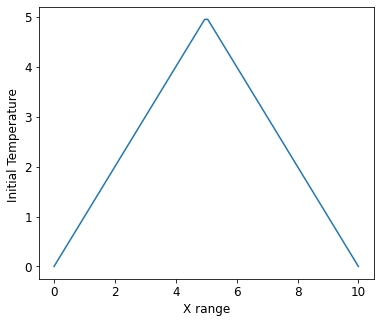

In [3]:
## Initialize the function U(Temperature) and plot it
u_initial = np.zeros_like(x)
u_initial[0:int(N/2)] = x[0:int(N/2)]
u_initial[int(N/2) : N] = L - x[int(N/2):int(N)]

#plot
plt.plot(x,u_initial)
plt.xlabel("X range")
plt.ylabel("Initial Temperature ")

### Heat Equation
#### If u is the function representing the temperature, then
$$ \frac{du}{dt} = c^{2}\frac{d^{2}u}{dx^{2}} $$
#### Taking fourier transform we get
$$ FT(u) = u_{ft}$$
$$ \frac{du_{ft}}{dt} = -w^{2}c^{2}u_{ft}$$
#### Solve the ODE and take the inverse to get the solution
$$ u_{soln} = IFT(u_{Ft})$$


In [4]:
### Get the fourier transform of the initial temperature 
### Odeint function takes in real numbers as input -> therefore concatenate the real ansd imaginary coeff
def get_fourier_transform(u):
    u_ft = np.fft.fft(u)
    return np.concatenate((u_ft.real,u_ft.imag))

def get_inverse_fourier_transform(u_ft):
    u = np.fft.ifft(u_ft)
    return u.real

def get_complex_num_form(u_ft):
    return u_ft[:N] + (1j)*u_ft[N:]

In [7]:
#Define the time interval to get the time evolution of the system
dt = 0.1
t = np.arange(0,10,dt)

In [8]:
## Get the RHS of the differential eqaution -> first argument for the odeint function
def rhs_diff_eqn(u_ft_separate,t,omega,c):
    u_ft = get_complex_num_form(u_ft_separate)
    d_uft = -c**2 * (np.power(omega,2))*u_ft
    d_uft_separate  =np.concatenate((d_uft.real,d_uft.imag)).astype('float64')
    return d_uft_separate

### Solve the individual ODEs -> The output will be a concatenated list of real and imaginary coefficients
### stored in usoln_ft_separate
usoln_ft_separate = odeint(rhs_diff_eqn, get_fourier_transform(u_initial),t,args= (omega,c))

In [10]:
### Get the inverse fourier transform of the solution
u_soln = np.zeros((len(t),len(x)))
for k in range(len(t)):
    usoln_ft = get_complex_num_form(usoln_ft_separate[k,:])
    u_soln[k,:] = get_inverse_fourier_transform(usoln_ft)

Text(0, 0.5, 'Final temperature for different time t')

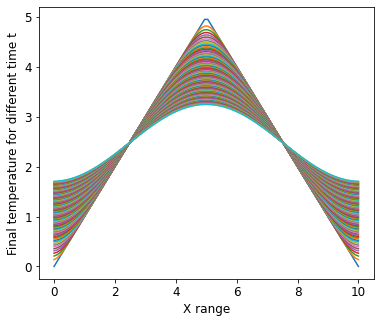

In [11]:
# Plot the solution for each time 't' -> The temperature tends to a constant value as the time increases 
for i in range(len(t)):
    plt.plot(x,u_soln[i])
plt.xlabel('X range')
plt.ylabel('Final temperature for different time t')